Część 1:

Analiza zmian zjawisk w czasie porządkuje informacje i pozwala na wyciągnięcie bardziej szczegółowych wniosków, np. trendów ze składowymi okresowymi.

Trend to tendencja rozwojowa, która wskazuje ogólny kierunek rozwoju zjawiska. Rozwój zjawiska rozumiany jest jako systematyczne zmiany, jakim podlega to zjawisko. Rozróżniany jest m.in. trend liniowy i nieliniowy.

Składowe okresowe to regularne odchylenia od trendu. Wahania cykliczne charakteryzują się długookresowymi, rytmicznymi odchyleniami. Wahania sezonowe są krótkookresowe i odzwierciedlają wpływ zachowań wynikający z kalendarza. 

Wyznacz średnią kroczącą i odchylenie standardowe kroczące (np. 7-dniowe), aby zobaczyć, jak te zjawiska zmieniają się w czasie. Obliczenia wykonaj dla:

1.1. liczby nowych zachorowań,

1.2. liczby nowych śmierci,

1.3. liczby nowych szczepień,

1.4. 2 innych różnych informacji, które uznasz za istotne.

Możesz przefiltrować dane, jeżeli uznasz to za potrzebne. Sprawdź, czy dla tych informacji można zaobserwować trendy (np. sezonowe wzorce lub cykle) i wahania. Przeanalizuj otrzymane wyniki. 

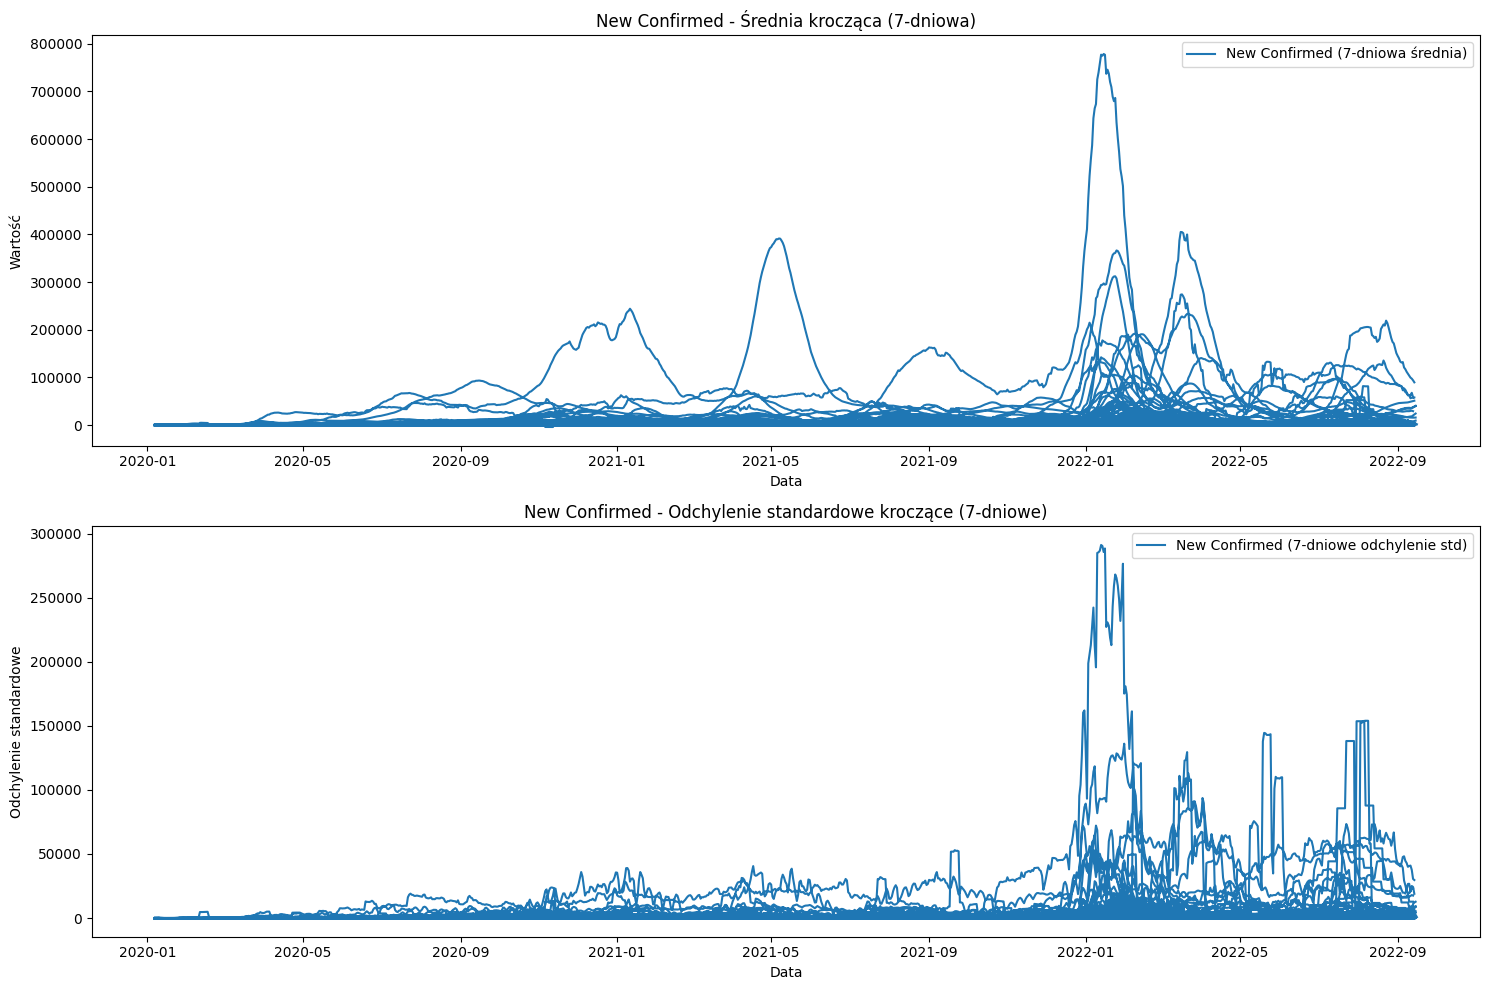

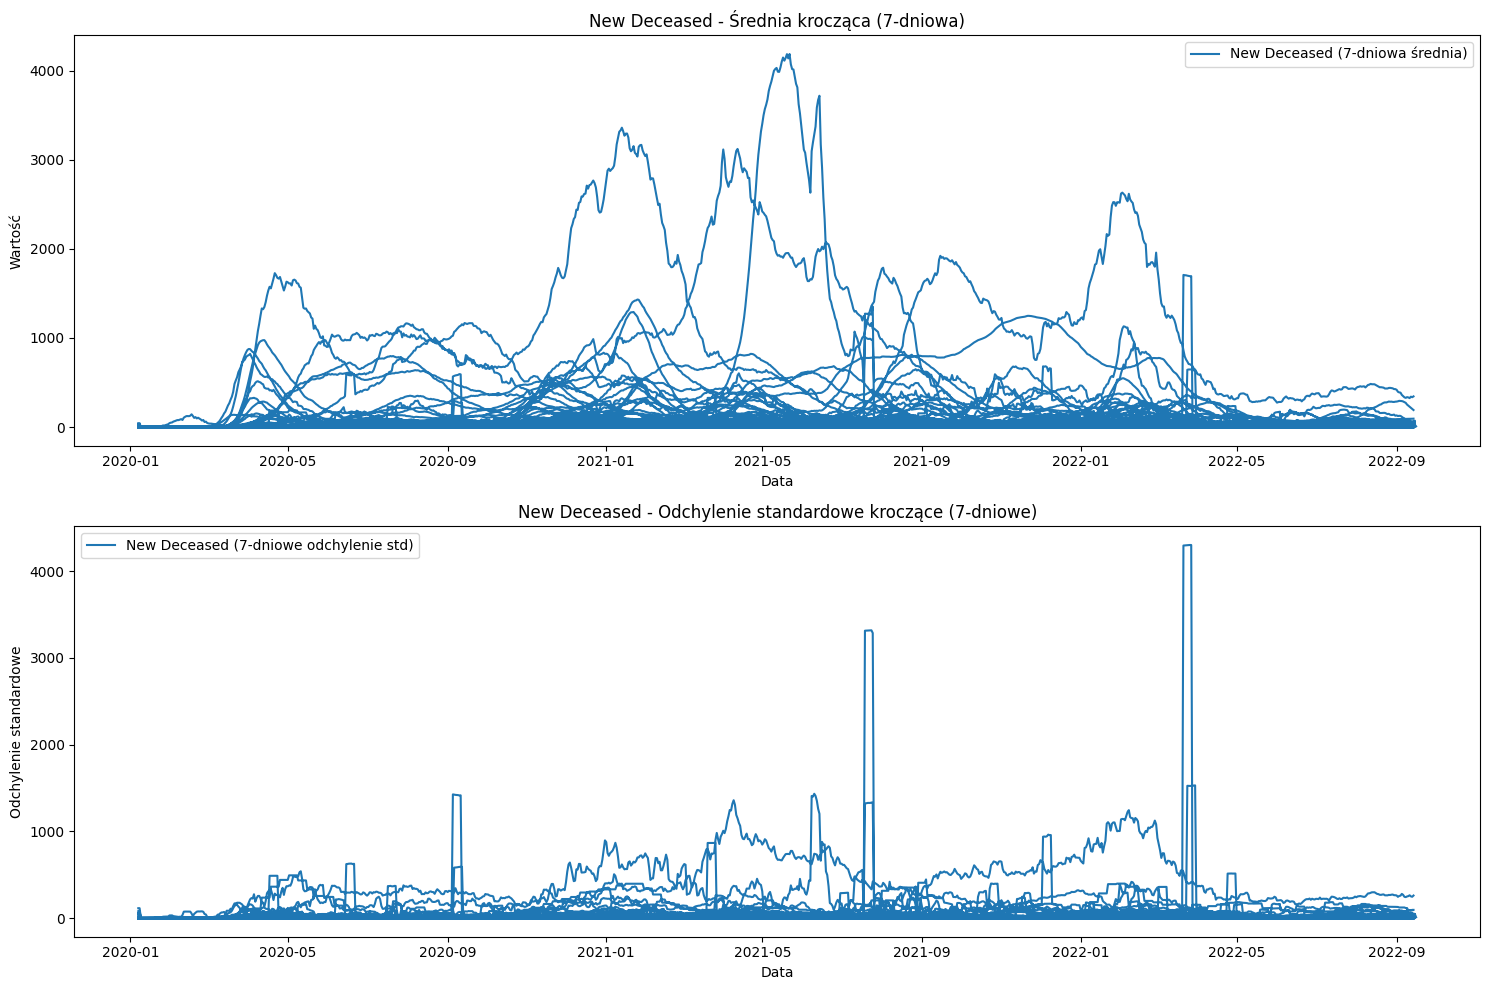

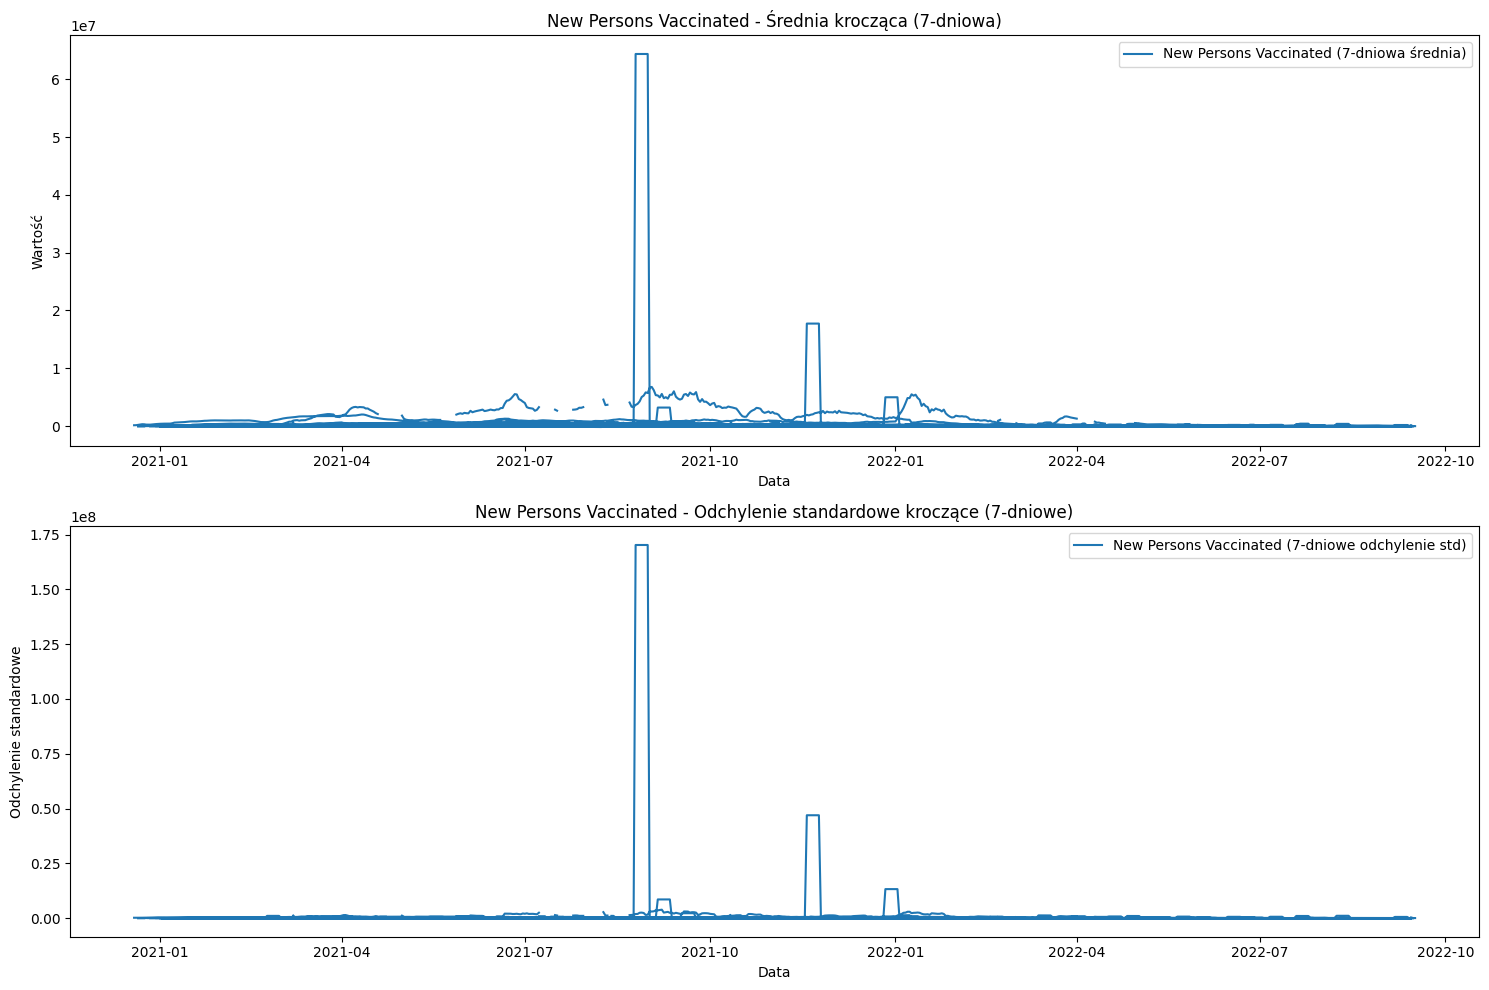

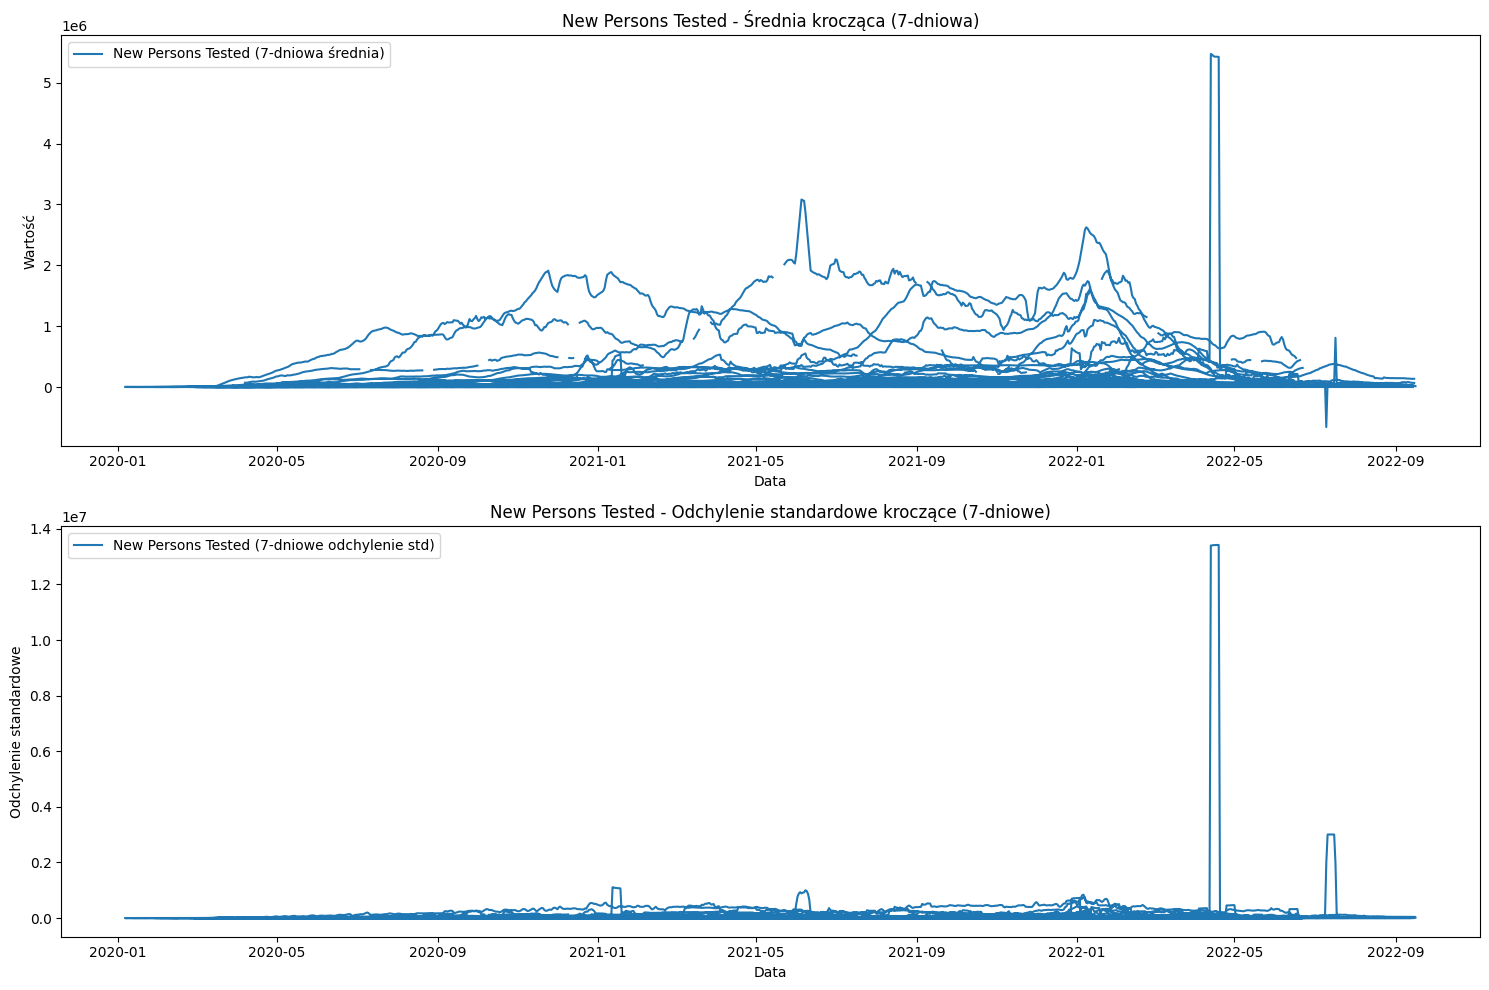

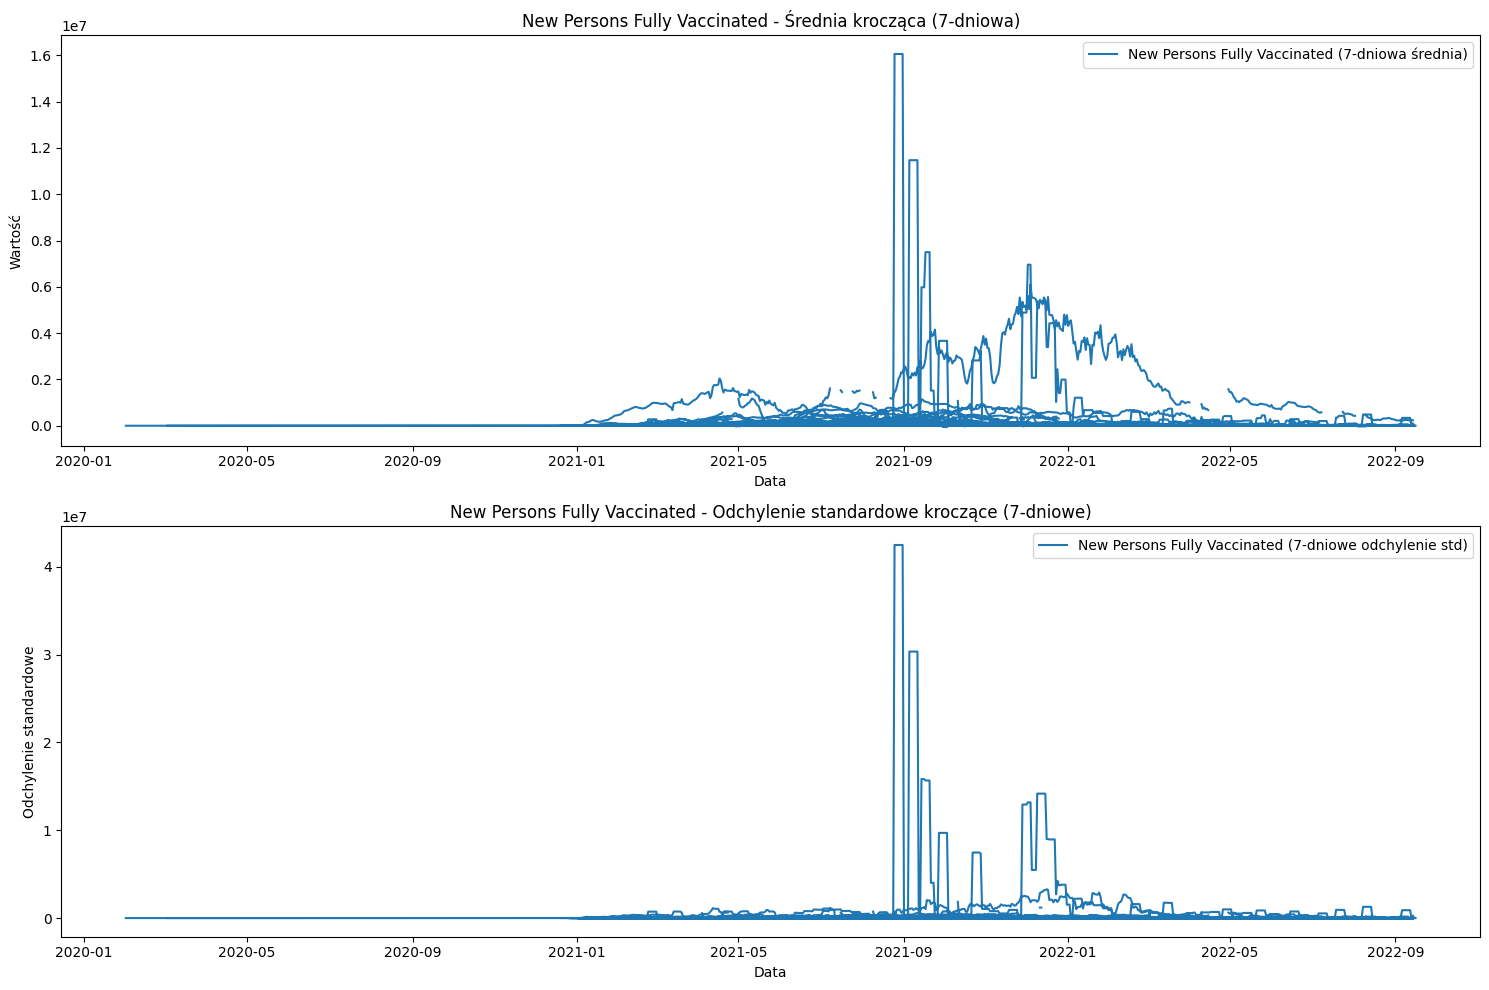

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

merged_covid_df = pd.read_csv('wyniki\\merged_5.csv')
merged_covid_df['date'] = pd.to_datetime(merged_covid_df['date'])
merged_covid_df.set_index('date', inplace=True)

rolling_window = 7


# Średnia krocząca
merged_covid_df['rolling_new_confirmed'] = merged_covid_df['new_confirmed'].rolling(window=rolling_window).mean()
merged_covid_df['rolling_new_deceased'] = merged_covid_df['new_deceased'].rolling(window=rolling_window).mean()
merged_covid_df['rolling_new_persons_vaccinated'] = merged_covid_df['new_persons_vaccinated'].rolling(window=rolling_window).mean()
merged_covid_df['rolling_new_tested'] = merged_covid_df['new_tested'].rolling(window=rolling_window).mean()
merged_covid_df['rolling_new_persons_fully_vaccinated'] = merged_covid_df['new_persons_fully_vaccinated'].rolling(window=rolling_window).mean()

# Odchylenie standardowe kroczące
merged_covid_df['rolling_std_new_confirmed'] = merged_covid_df['new_confirmed'].rolling(window=rolling_window).std()
merged_covid_df['rolling_std_new_deceased'] = merged_covid_df['new_deceased'].rolling(window=rolling_window).std()
merged_covid_df['rolling_std_new_persons_vaccinated'] = merged_covid_df['new_persons_vaccinated'].rolling(window=rolling_window).std()
merged_covid_df['rolling_std_new_tested'] = merged_covid_df['new_tested'].rolling(window=rolling_window).std()
merged_covid_df['rolling_std_new_persons_fully_vaccinated'] = merged_covid_df['new_persons_fully_vaccinated'].rolling(window=rolling_window).std()

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(merged_covid_df.index, merged_covid_df['rolling_new_confirmed'], label='New Confirmed (7-dniowa średnia)')
plt.title('New Confirmed - Średnia krocząca (7-dniowa)')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(merged_covid_df.index, merged_covid_df['rolling_std_new_confirmed'], label='New Confirmed (7-dniowe odchylenie std)')
plt.title('New Confirmed - Odchylenie standardowe kroczące (7-dniowe)')
plt.xlabel('Data')
plt.ylabel('Odchylenie standardowe')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(merged_covid_df.index, merged_covid_df['rolling_new_deceased'], label='New Deceased (7-dniowa średnia)')
plt.title('New Deceased - Średnia krocząca (7-dniowa)')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(merged_covid_df.index, merged_covid_df['rolling_std_new_deceased'], label='New Deceased (7-dniowe odchylenie std)')
plt.title('New Deceased - Odchylenie standardowe kroczące (7-dniowe)')
plt.xlabel('Data')
plt.ylabel('Odchylenie standardowe')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(merged_covid_df.index, merged_covid_df['rolling_new_persons_vaccinated'], label='New Persons Vaccinated (7-dniowa średnia)')
plt.title('New Persons Vaccinated - Średnia krocząca (7-dniowa)')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(merged_covid_df.index, merged_covid_df['rolling_std_new_persons_vaccinated'], label='New Persons Vaccinated (7-dniowe odchylenie std)')
plt.title('New Persons Vaccinated - Odchylenie standardowe kroczące (7-dniowe)')
plt.xlabel('Data')
plt.ylabel('Odchylenie standardowe')
plt.legend()

plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(merged_covid_df.index, merged_covid_df['rolling_new_tested'], label='New Persons Tested (7-dniowa średnia)')
plt.title('New Persons Tested - Średnia krocząca (7-dniowa)')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(merged_covid_df.index, merged_covid_df['rolling_std_new_tested'], label='New Persons Tested (7-dniowe odchylenie std)')
plt.title('New Persons Tested - Odchylenie standardowe kroczące (7-dniowe)')
plt.xlabel('Data')
plt.ylabel('Odchylenie standardowe')
plt.legend()

plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(merged_covid_df.index, merged_covid_df['rolling_new_persons_fully_vaccinated'], label='New Persons Fully Vaccinated (7-dniowa średnia)')
plt.title('New Persons Fully Vaccinated - Średnia krocząca (7-dniowa)')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(merged_covid_df.index, merged_covid_df['rolling_std_new_persons_fully_vaccinated'], label='New Persons Fully Vaccinated (7-dniowe odchylenie std)')
plt.title('New Persons Fully Vaccinated - Odchylenie standardowe kroczące (7-dniowe)')
plt.xlabel('Data')
plt.ylabel('Odchylenie standardowe')
plt.legend()

plt.tight_layout()
plt.show()

Część 2
Wykorzystaj do analizy trendów analizę szeregów czasowych (metoda średniej ruchomej czy inne modele autoregresyjne), która umożliwi zbadanie 5 przypadków rozważanych w części 1 poziomu 3. Przeanalizuj otrzymane wyniki

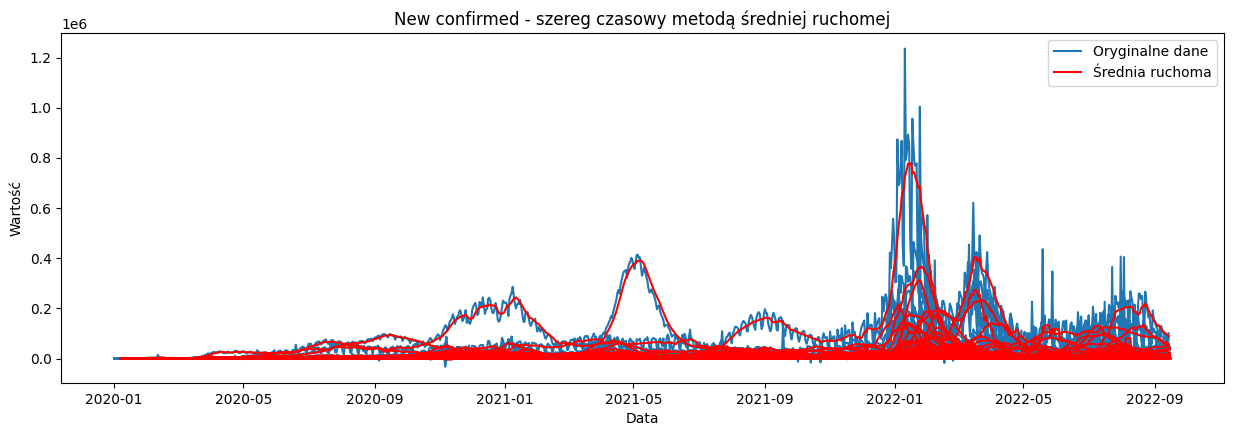

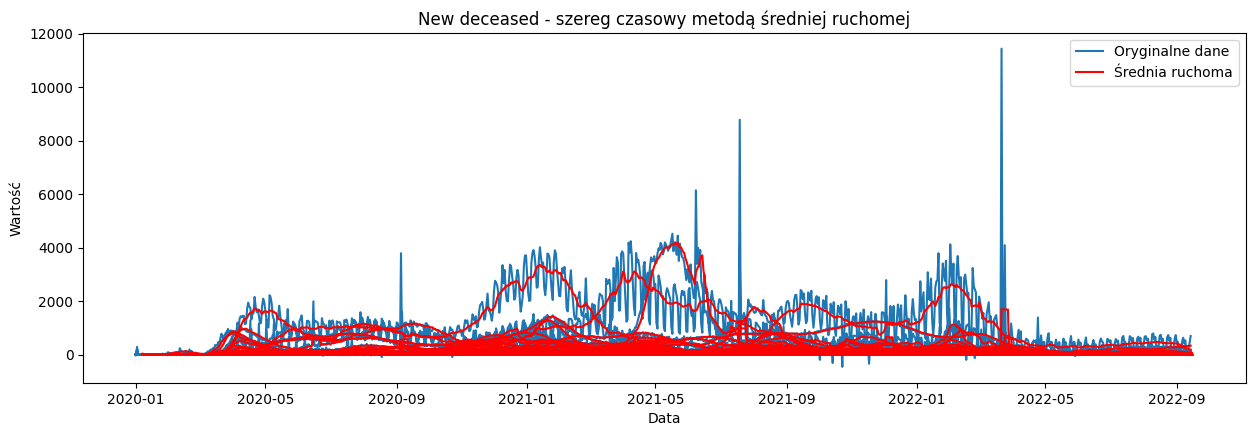

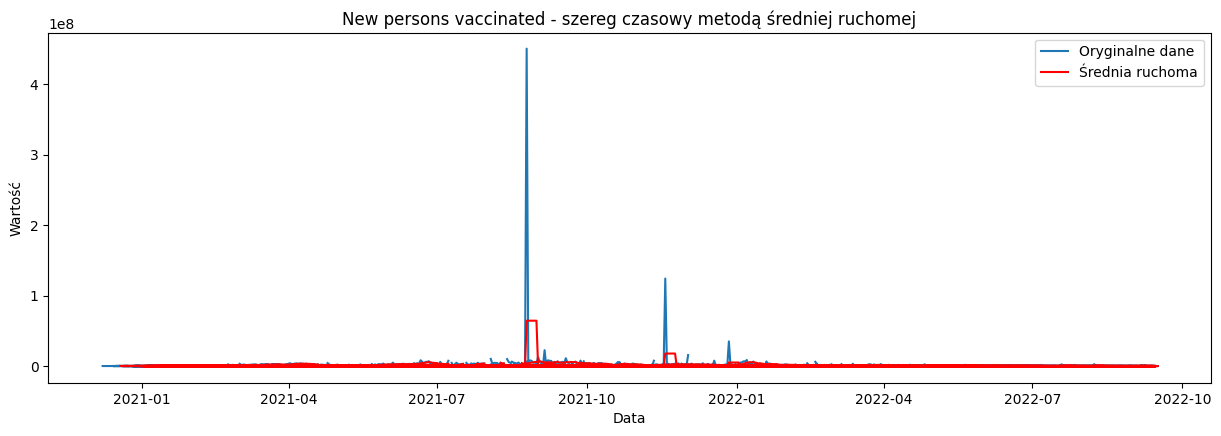

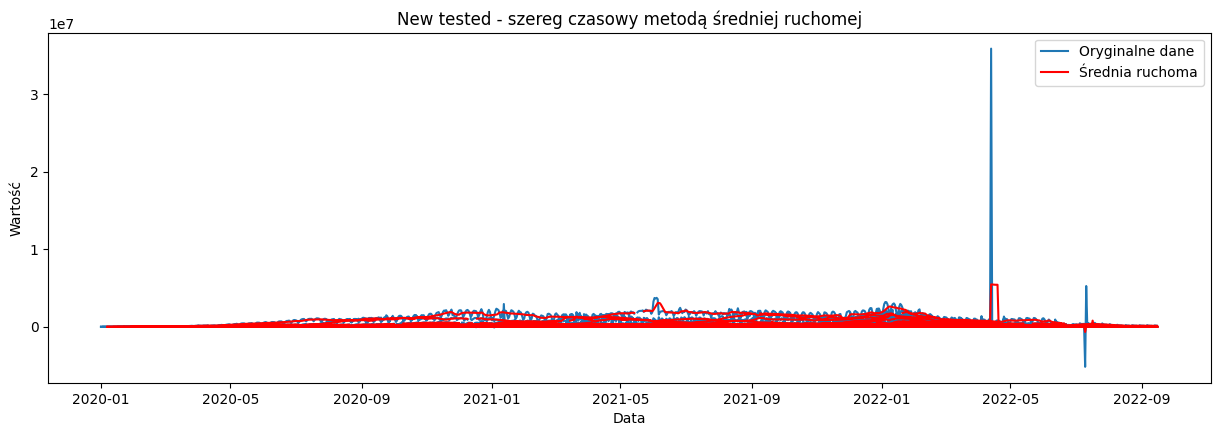

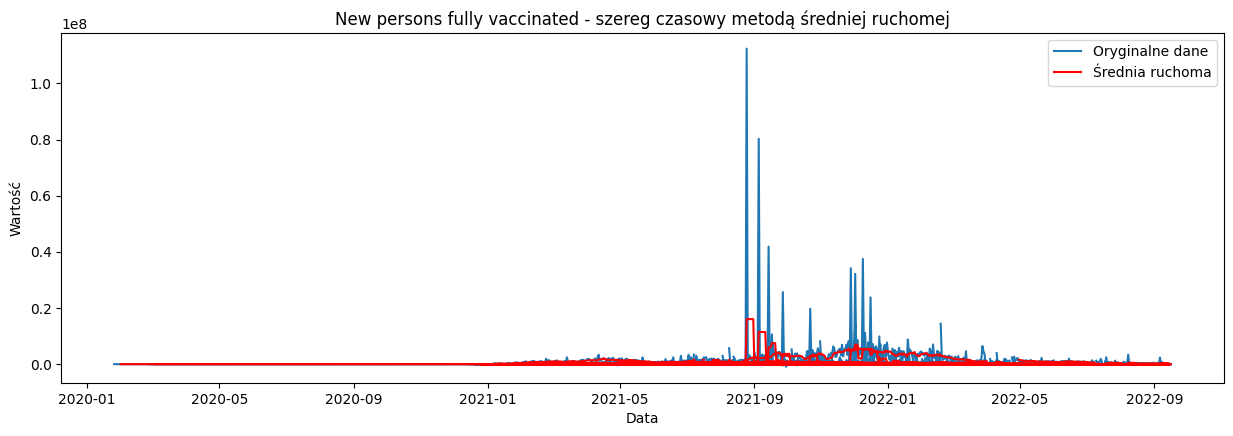

In [10]:
window_size = 7

rolling_mean_new_confirmed = merged_covid_df['new_confirmed'].rolling(window=window_size).mean()
rolling_mean_new_deceased = merged_covid_df['new_deceased'].rolling(window=window_size).mean()
rolling_mean_new_persons_vaccinated = merged_covid_df['new_persons_vaccinated'].rolling(window=window_size).mean()
rolling_mean_new_tested = merged_covid_df['new_tested'].rolling(window=window_size).mean()
rolling_mean_new_persons_fully_vaccinated = merged_covid_df['new_persons_fully_vaccinated'].rolling(window=window_size).mean()

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(merged_covid_df['new_confirmed'], label='Oryginalne dane')
plt.plot(rolling_mean_new_confirmed, label='Średnia ruchoma', color='red')
plt.title('New confirmed - szereg czasowy metodą średniej ruchomej')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()
plt.show()


plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(merged_covid_df['new_deceased'], label='Oryginalne dane')
plt.plot(rolling_mean_new_deceased, label='Średnia ruchoma', color='red')
plt.title('New deceased - szereg czasowy metodą średniej ruchomej')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(merged_covid_df['new_persons_vaccinated'], label='Oryginalne dane')
plt.plot(rolling_mean_new_persons_vaccinated, label='Średnia ruchoma', color='red')
plt.title('New persons vaccinated - szereg czasowy metodą średniej ruchomej')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(merged_covid_df['new_tested'], label='Oryginalne dane')
plt.plot(rolling_mean_new_tested, label='Średnia ruchoma', color='red')
plt.title('New tested - szereg czasowy metodą średniej ruchomej')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()
plt.show()

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(merged_covid_df['new_persons_fully_vaccinated'], label='Oryginalne dane')
plt.plot(rolling_mean_new_persons_fully_vaccinated, label='Średnia ruchoma', color='red')
plt.title('New persons fully vaccinated - szereg czasowy metodą średniej ruchomej')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()
plt.show()


Część 3
Przygotuj dane treningowe w interesującym Cię okresie czasu (np. druga połowa 2020 roku i pierwsza połowa 2021 roku, tj. 52 tygodnie = X) oraz ewentualne dane testowe. Możesz przefiltrować dane także po innych kryteriach, jeżeli uznasz to za potrzebne. Zastosuj analizę regresji, aby przewidzieć wartości w kolejnych X tygodniach następujących po wybranym okresie treningowym. Użyj modelu regresji liniowej, gdzie zmienną niezależną będzie czas, a zmienną zależną:

3.1. liczba nowych zachorowań,

3.2. liczba nowych śmierci,

3.3. liczba nowych szczepień,

3.4. 2 inne różne informacje, które uznasz za istotne.

Przeanalizuj otrzymane wyniki.

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Zakładając, że masz DataFrame o nazwie df z kolumnami 'date', 'country_name', 'new_confirmed', 'new_deceased', 'new_persons_vaccinated'
# oraz 'gdp'

# Przefiltrowanie danych dla Polski i wybranego okresu
df_poland = merged_covid_df[(merged_covid_df['country_name'] == 'Poland') & (merged_covid_df['date'] >= '2021-07-01') & (merged_covid_df['date'] <= '2022-06-30')]

# Podział danych na zestaw treningowy i testowy
X = np.arange(len(df_poland)).reshape(-1, 1)  # czas
y_new_confirmed = df_poland['new_confirmed'].values
y_new_deceased = df_poland['new_deceased'].values
y_new_persons_vaccinated = df_poland['new_persons_vaccinated'].values
y_new_tested = df_poland['new_tested'].values

X_train, X_test, y_train_confirmed, y_test_confirmed = train_test_split(X, y_new_confirmed, test_size=0.2, random_state=42)
_, _, y_train_deceased, y_test_deceased = train_test_split(X, y_new_deceased, test_size=0.2, random_state=42)
_, _, y_train_vaccinated, y_test_vaccinated = train_test_split(X, y_new_persons_vaccinated, test_size=0.2, random_state=42)
_, _, y_train_new_tested , y_test_new_tested  = train_test_split(X, y_new_tested , test_size=0.2, random_state=42)

# Funkcja do przewidywania za pomocą regresji liniowej
def linear_regression_prediction(X_train, y_train, X_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

# Przewidywanie wartości za pomocą regresji liniowej
predictions_confirmed = linear_regression_prediction(X_train, y_train_confirmed, X_test)
predictions_deceased = linear_regression_prediction(X_train, y_train_deceased, X_test)
predictions_vaccinated = linear_regression_prediction(X_train, y_train_vaccinated, X_test)
predictions_new_tested = linear_regression_prediction(X_train, y_new_tested, X_test)

# Wykresy
fig, axes = plt.subplots(4, 1, figsize=(12, 16))

axes[0].scatter(X_test, y_test_confirmed, color='blue', label='Rzeczywiste wartości')
axes[0].plot(X_test, predictions_confirmed, color='red', label='Przewidywane wartości')
axes[0].set_title('Liczba nowych zachorowań w Polsce')
axes[0].set_xlabel('Czas')
axes[0].set_ylabel('Liczba')
axes[0].legend()

axes[1].scatter(X_test, y_test_deceased, color='blue', label='Rzeczywiste wartości')
axes[1].plot(X_test, predictions_deceased, color='red', label='Przewidywane wartości')
axes[1].set_title('Liczba nowych zgonów w Polsce')
axes[1].set_xlabel('Czas')
axes[1].set_ylabel('Liczba')
axes[1].legend()

axes[2].scatter(X_test, y_test_vaccinated, color='blue', label='Rzeczywiste wartości')
axes[2].plot(X_test, predictions_vaccinated, color='red', label='Przewidywane wartości')
axes[2].set_title('Liczba nowych szczepień w Polsce')
axes[2].set_xlabel('Czas')
axes[2].set_ylabel('Liczba')
axes[2].legend()

axes[3].scatter(X_test, y_new_tested , color='blue', label='Rzeczywiste wartości')
axes[3].plot(X_test, predictions_new_tested, color='red', label='Przewidywane wartości')
axes[3].set_title('Liczba nowych testów w Polsce')
axes[3].set_xlabel('Czas')
axes[3].set_ylabel('Liczba')
axes[3].legend()

plt.tight_layout()
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [292, 365]